In [53]:
!pip3 install matplotlib

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv', header = None)

# Extract the header from the first row and create a list of attributes names
attribute_names = df.iloc[0].tolist()
df.columns = attribute_names
# Create a DataFrame from the remaining rows (excluding the first one)
df = df[1:]


# Convert specific columns to numeric
columns_to_convert = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Split the data assuming the last column is the target variable
X = df.iloc[:, :-1]   # All columns except the last one
Y = df.iloc[:, -1]    # The last column is the target

# Removing the redundant and focusing on relevant features
X = X.drop(X.columns[:3], axis=1)

       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1              619    France  Female   42       2       0.00              1   
2              608     Spain  Female   41       1   83807.86              1   
3              502    France  Female   42       8  159660.80              3   
4              699    France  Female   39       1       0.00              2   
5              850     Spain  Female   43       2  125510.82              1   
...            ...       ...     ...  ...     ...        ...            ...   
9996           771    France    Male   39       5       0.00              2   
9997           516    France    Male   35      10   57369.61              1   
9998           709    France  Female   36       7       0.00              1   
9999           772   Germany    Male   42       3   75075.31              2   
10000          792    France  Female   28       4  130142.79              1   

       HasCrCard  IsActiveMember  EstimatedSalary  

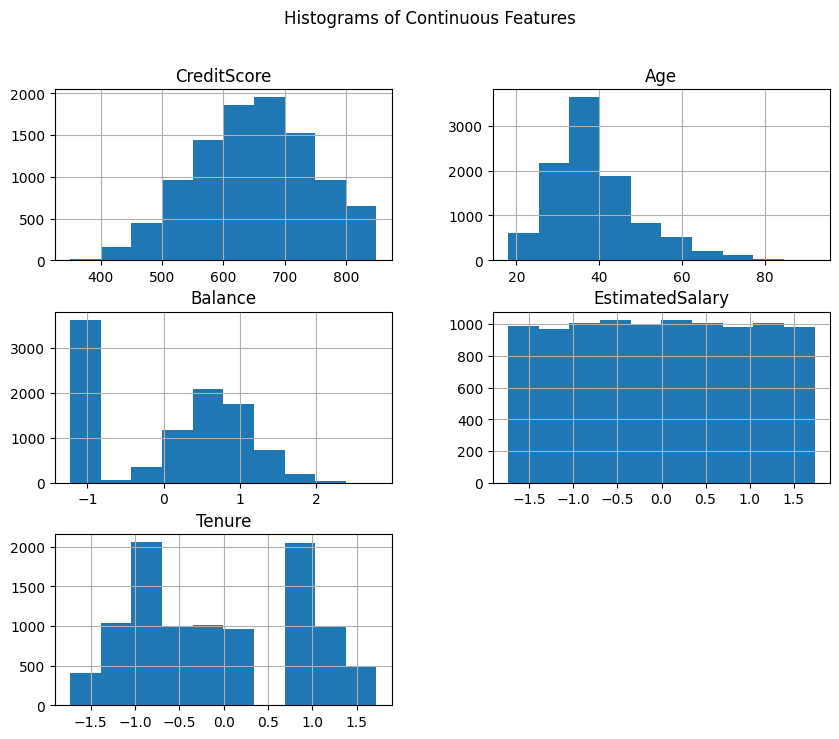

In [65]:
# Explore the Data
# Plot histograms for continuous features
X[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']].hist(figsize=(10, 8))
plt.suptitle('Histograms of Continuous Features')
plt.show()

In [62]:
# Handle Missing Data
# Checking for missing values
missing_values = X.isnull().sum()
print("Missing values in each column:", missing_values[missing_values > 0])

Missing values in each column: Series([], dtype: int64)


In [63]:
# Label Encoding for Gender: 'Male' -> 1, 'Female' -> 0 
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0}) 

# One-Hot Encoding for Geography, generating Geography_Germany and Geography_Spain 
X = pd.get_dummies(X, columns=['Geography']) 

# Convert boolean columns (True/False) to integers (1/0) for one-hot encoded columns 
X['Geography_Germany'] = X['Geography_Germany'].astype(int) 
X['Geography_Spain'] = X['Geography_Spain'].astype(int) 
X['Geography_France'] = X['Geography_France'].astype(int) 

# Check the result 
print(X) 

       CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
1              619       0   42       2       0.00              1          1   
2              608       0   41       1   83807.86              1          0   
3              502       0   42       8  159660.80              3          1   
4              699       0   39       1       0.00              2          0   
5              850       0   43       2  125510.82              1          1   
...            ...     ...  ...     ...        ...            ...        ...   
9996           771       1   39       5       0.00              2          1   
9997           516       1   35      10   57369.61              1          1   
9998           709       0   36       7       0.00              1          0   
9999           772       1   42       3   75075.31              2          1   
10000          792       0   28       4  130142.79              1          1   

       IsActiveMember  EstimatedSalary 

In [64]:
# Feature Scaling
# Standardizing manually (scaling to mean 0, std 1)
X['Balance'] = (X['Balance'] - X['Balance'].mean()) / X['Balance'].std()  # Standardizing 'Balance'
X['Tenure'] = (X['Tenure'] - X['Tenure'].mean()) / X['Tenure'].std()  # Standardizing 'Tenure'
X['EstimatedSalary'] = (X['EstimatedSalary'] - X['EstimatedSalary'].mean()) / X['EstimatedSalary'].std()  # Standardizing 'EstimatedSalary'
X['NumOfProducts'] = (X['NumOfProducts'] - X['NumOfProducts'].mean()) / X['NumOfProducts'].std()  # Standardizing 'NumOfProducts'

# Display the standardized columns
print(X[['Balance', 'Tenure', 'EstimatedSalary', 'NumOfProducts']].head())

    Balance    Tenure  EstimatedSalary  NumOfProducts
1 -1.225786 -1.041708         0.021885      -0.911538
2  0.117344 -1.387468         0.216523      -0.911538
3  1.332987  1.032856         0.240675       2.526930
4 -1.225786 -1.387468        -0.108912       0.807696
5  0.785689 -1.041708        -0.365258      -0.911538


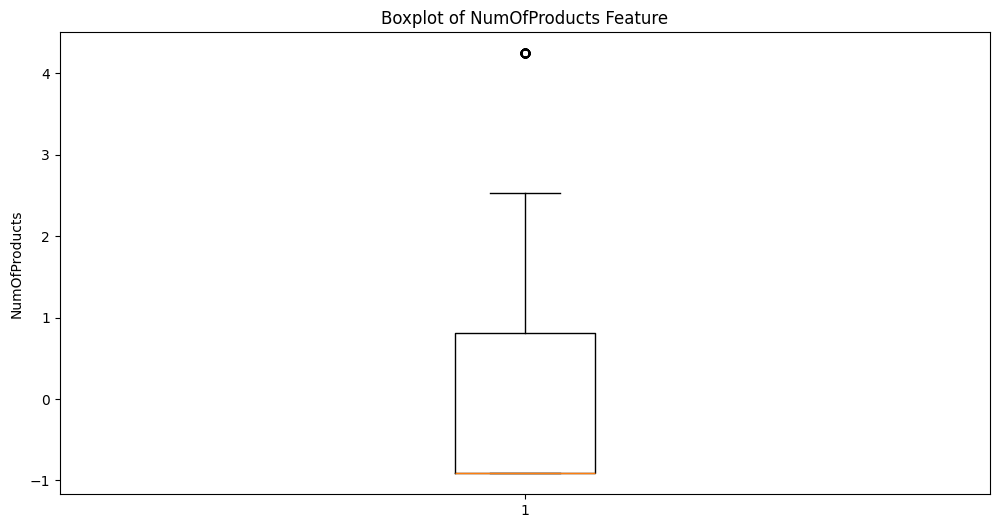

In [66]:
# Assuming X is your DataFrame and you want to plot the 'NumOfProducts' feature
num_of_products = X['NumOfProducts']
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the boxplot
ax.boxplot(num_of_products)
# Set title and labels
ax.set_title('Boxplot of NumOfProducts Feature')
ax.set_ylabel('NumOfProducts')
# Display the plot
plt.show()

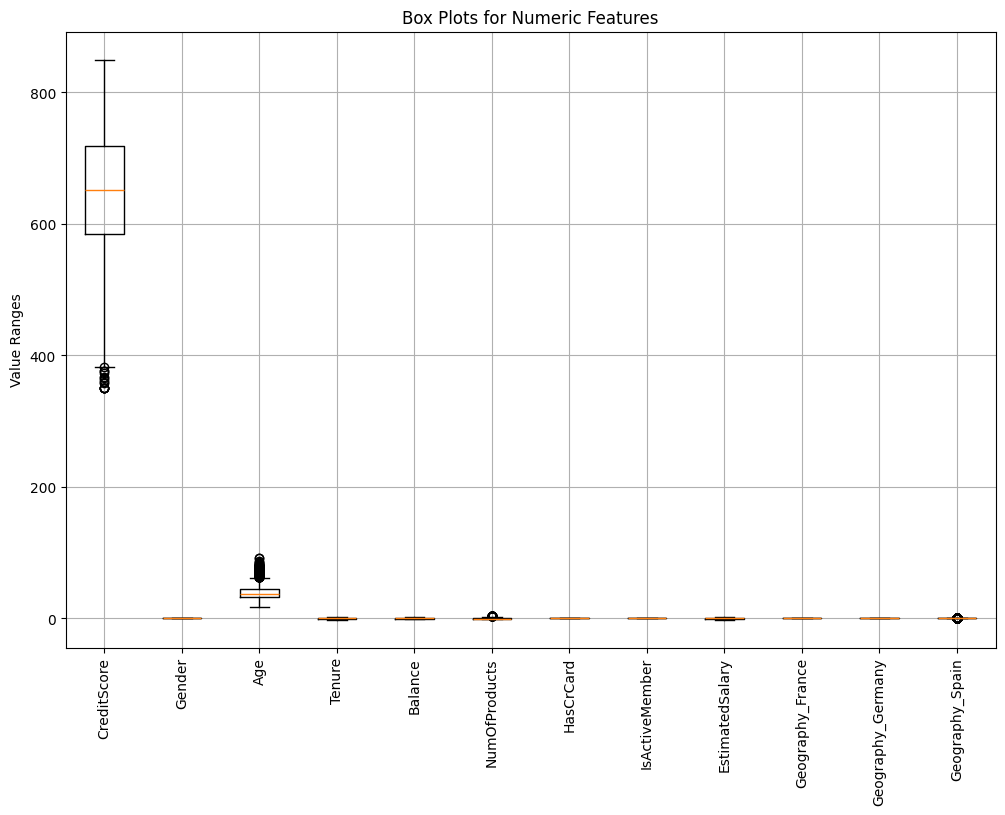

In [68]:
plt.figure(figsize=(12, 8))  # Set figure size
plt.boxplot(X.values, tick_labels=X.columns)

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title('Box Plots for Numeric Features')
plt.ylabel('Value Ranges')
plt.grid(True)

plt.show()